In [9]:
import sys
import os

import matplotlib.pyplot as plt
import numpy as np

cwd = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(cwd, "..")))

from evaluation.prediction_reader import score_result

In [10]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None, ylim=None):
    
    # plt.rcParams.update({"font.size": 12, "font.family": "serif", "font.serif": ["NewComputerModern10"]})
    # plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

    plt.figure(figsize=(6, 3))

    # colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']
    colour_scheme = ['#52B297', '#8E4A93', '#009EE7', '#EF766E', '#B9DFD5', '#CCA0CF']

    # Set the width of each box
    box_width = 0.15


    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='-', linewidth=1, color='black')
        meanprops = dict(linestyle='-', linewidth=1, color='none')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])
        

    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)
    
    if ylim is not None:
        plt.ylim(-0.005, ylim)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(data), frameon=False)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.pdf', format='pdf', bbox_inches='tight')

    
    plt.show()

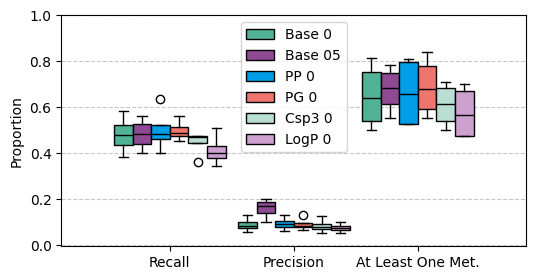

In [11]:

bs = 4

r_chemf_base_0, p_chemf_base_0, s1_chemf_base_0, _ = score_result('../evaluation/accio/result_chemf_base_0.csv', bs, False)
r_chemf_base_05, p_chemf_base_05, s1_chemf_base_05, _  = score_result('../evaluation/accio/result_chemf_base_05.csv', bs, False)
r_chemf_PP_0, p_chemf_PP_0, s1_chemf_PP_0, _  = score_result('../evaluation/accio/result_chemf_PP_0.csv', bs, False)
r_chemf_PG_0, p_chemf_PG_0, s1_chemf_PG_0, _  = score_result('../evaluation/accio/result_chemf_PG_0.csv', bs, False)
r_chemf_csp3_0, p_chemf_csp3_0, s1_chemf_csp3_0, _  = score_result('../evaluation/accio/result_chemf_csp3_0.csv', bs, False)
r_chemf_logp_0, p_chemf_logp_0, s1_chemf_logp_0, _  = score_result('../evaluation/accio/result_chemf_logp_0.csv', bs, False)

base_0 = [r_chemf_base_0[-2], p_chemf_base_0[-2], s1_chemf_base_0[-2]]
base_05 = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2]]
PP = [r_chemf_PP_0[-2], p_chemf_PP_0[-2], s1_chemf_PP_0[-2]]
PG = [r_chemf_PG_0[-2], p_chemf_PG_0[-2], s1_chemf_PG_0[-2]]
csp3 = [r_chemf_csp3_0[-2], p_chemf_csp3_0[-2], s1_chemf_csp3_0[-2]]
logp = [r_chemf_logp_0[-2], p_chemf_logp_0[-2], s1_chemf_logp_0[-2]]

xlabel = None
xticks = ['Recall', 'Precision', 'At Least One Met.']
labels = ['Base 0', 'Base 05', 'PP 0', 'PG 0', 'Csp3 0', 'LogP 0']

ylabel = 'Proportion'
data = [base_0, base_05, PP, PG, csp3, logp]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper center', 'best_model', 1)

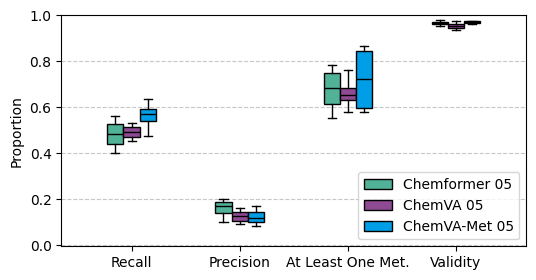

In [12]:

bs = 4

r_chemf_base_05, p_chemf_base_05, s1_chemf_base_05, _  = score_result('../evaluation/accio/result_chemf_base_05.csv', bs, False)
r_chemVA_base_05, p_chemVA_base_05, s1_chemVA_base_05, _  = score_result('../evaluation/accio/result_chemVA_base_05.csv', bs, False)
r_chemVAMet_base_05, p_chemVAMet_base_05, s1_chemVAMet_base_05, _ = score_result('../evaluation/accio/result_chemVA-Met_base_05.csv', bs, False)

chemf_val = [0.9552631578947368, 0.9671052631578947, 0.9644736842105263, 0.9783783783783784]
chemVA_val = [0.9552631578947368, 0.95, 0.9355263157894737, 0.977027027027027]
chemVAMet_val = [0.9736842105263158, 0.968421052631579, 0.9605263157894737, 0.972972972972973]



chemf = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2], chemf_val]
chemVA = [r_chemVA_base_05[-2], p_chemVA_base_05[-2], s1_chemVA_base_05[-2], chemVA_val]
chemVAMet = [r_chemVAMet_base_05[-2], p_chemVAMet_base_05[-2], s1_chemVAMet_base_05[-2], chemVAMet_val]


xlabel = None
xticks = ['Recall', 'Precision', 'At Least One Met.', 'Validity']
labels = ['Chemformer 05', 'ChemVA 05', 'ChemVA-Met 05']

ylabel = 'Proportion'
data = [chemf, chemVA, chemVAMet]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'best_model', 1)

ValueError: 'outside' option for loc='outside right' keyword argument only works for figure legends

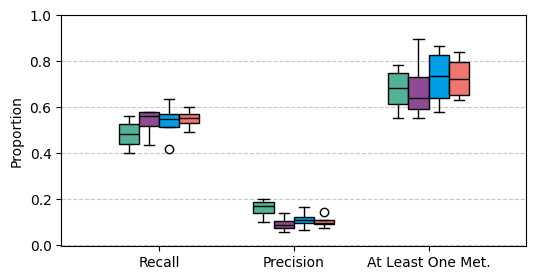

In [16]:
# Ensemble models on ChemVA - Met
bs = 4

r_chemVAMet_base_05, p_chemVAMet_base_05, s1_chemVAMet_base_05, _ = score_result('../evaluation/accio/result_chemVA-Met_base_05.csv', bs, False) 
r_ensemble_parent, p_ensemble_parent, s1_ensemble_parent, _ = score_result('../evaluation/accio/chemVA-Met_ensemble_parent_4_per_model.csv', bs, False)
r_ensemble_child, p_ensemble_child, s1_ensemble_child, _  = score_result('../evaluation/accio/chemVA-Met_ensemble_child_3_per_model.csv', bs, False)
r_ensemble_random, p_ensemble_random, s1_ensemble_random, _  = score_result('../evaluation/accio/chemVA-Met_ensemble_random_5_per_model.csv', bs, False)

base_05 = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2]]
ens_p = [r_ensemble_parent[-1], p_ensemble_parent[-1], s1_ensemble_parent[-1]]
ens_c = [r_ensemble_child[-1], p_ensemble_child[-1], s1_ensemble_child[-1]]
ens_r = [r_ensemble_random[-1], p_ensemble_random[-1], s1_ensemble_random[-1]]

xlabel = None
xticks = ['Recall', 'Precision', 'At Least One Met.']
labels = ['Single Top-10', 'Parent Split', 'Child Split', 'Random Split']

ylabel = 'Proportion'
data = [base_05, ens_p, ens_c, ens_r]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper center', 'ensemble', 1)